In [2]:
import operator
import pandas as pd
import numpy as np
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pecu6\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pecu6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pecu6\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pecu6\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
filename = './Data/DDLab.csv'
raw = pd.read_csv(filename, encoding = 'utf-8')
raw.head()

,ID,Before
0,1,多到爆炸的作業永無止境的疲憊
1,2,之前有自己編輯過 可以更進階
2,3,謝謝茄子
3,4,看教法如何 課程太過死板就不會有想進一步了解的傾向
4,5,雖然對這門課沒什麼多了解基礎，但還是有一點期待


In [4]:
raw['Before'][22]

'希望自己第一次學習時可以學到更多的知識，並且掌握清楚'

In [5]:
import re

def preprocess_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[a-zA-Z]', '', text)
    if not tokens:
        return None

    return ' '.join(tokens)

In [7]:
import jieba

file_name = 'dict.txt'
jieba.load_userdict(file_name)
tokenized_documents_R1 = []

for document in raw['Before']:
    #document = preprocess_text(document)
    tokens = jieba.cut(document)
    tokenized_documents_R1.append(" ".join(tokens))

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

dtm_R1 = vectorizer.fit_transform(tokenized_documents_R1)

dtm_R1_Words = vectorizer.get_feature_names()

X = dtm_R1.toarray()

C:\Users\pecu6\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
# 將 td_matrix 轉換為 DataFrame
df_tdm_R1 = pd.DataFrame(X, columns=list(dtm_R1_Words))
df_tdm_R1

,一些,一步,一點,一點點,不太難,不會,不會過,不活潑,不錯,並且,...,這是,這門,這門課,進階,還是,錯用,雖然,電腦,電腦白,非常
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
import numpy as np
from scipy.sparse import coo_matrix

In [11]:
# 計算共現矩陣
X_cooc = df_tdm_R1.dot(df_tdm_R1.T)

# 將 co-occurrence matrix 轉換成 coo_matrix
X_coo = X_cooc.stack().reset_index()
X_coo.columns = ['word1', 'word2', 'weight']
X_coo_df = X_coo[X_coo['weight'] > 0].reset_index(drop=True)

In [12]:
X_coo_df

,word1,word2,weight
0,0,0,6
1,0,12,2
2,1,1,5
3,1,7,2
4,1,10,1
...,...,...,...
295,35,22,3
296,35,24,2
297,35,29,3
298,35,33,2


In [13]:
import networkx as nx
import matplotlib.pyplot as plt

(array([183.,  60.,   0.,  25.,   0.,   6.,   5.,   0.,  10.,   0.,   2.,
          3.,   0.,   2.,   0.,   3.,   0.,   0.,   0.,   1.]),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ,
         7.6,  8.2,  8.8,  9.4, 10. , 10.6, 11.2, 11.8, 12.4, 13. ]),
 <BarContainer object of 20 artists>)

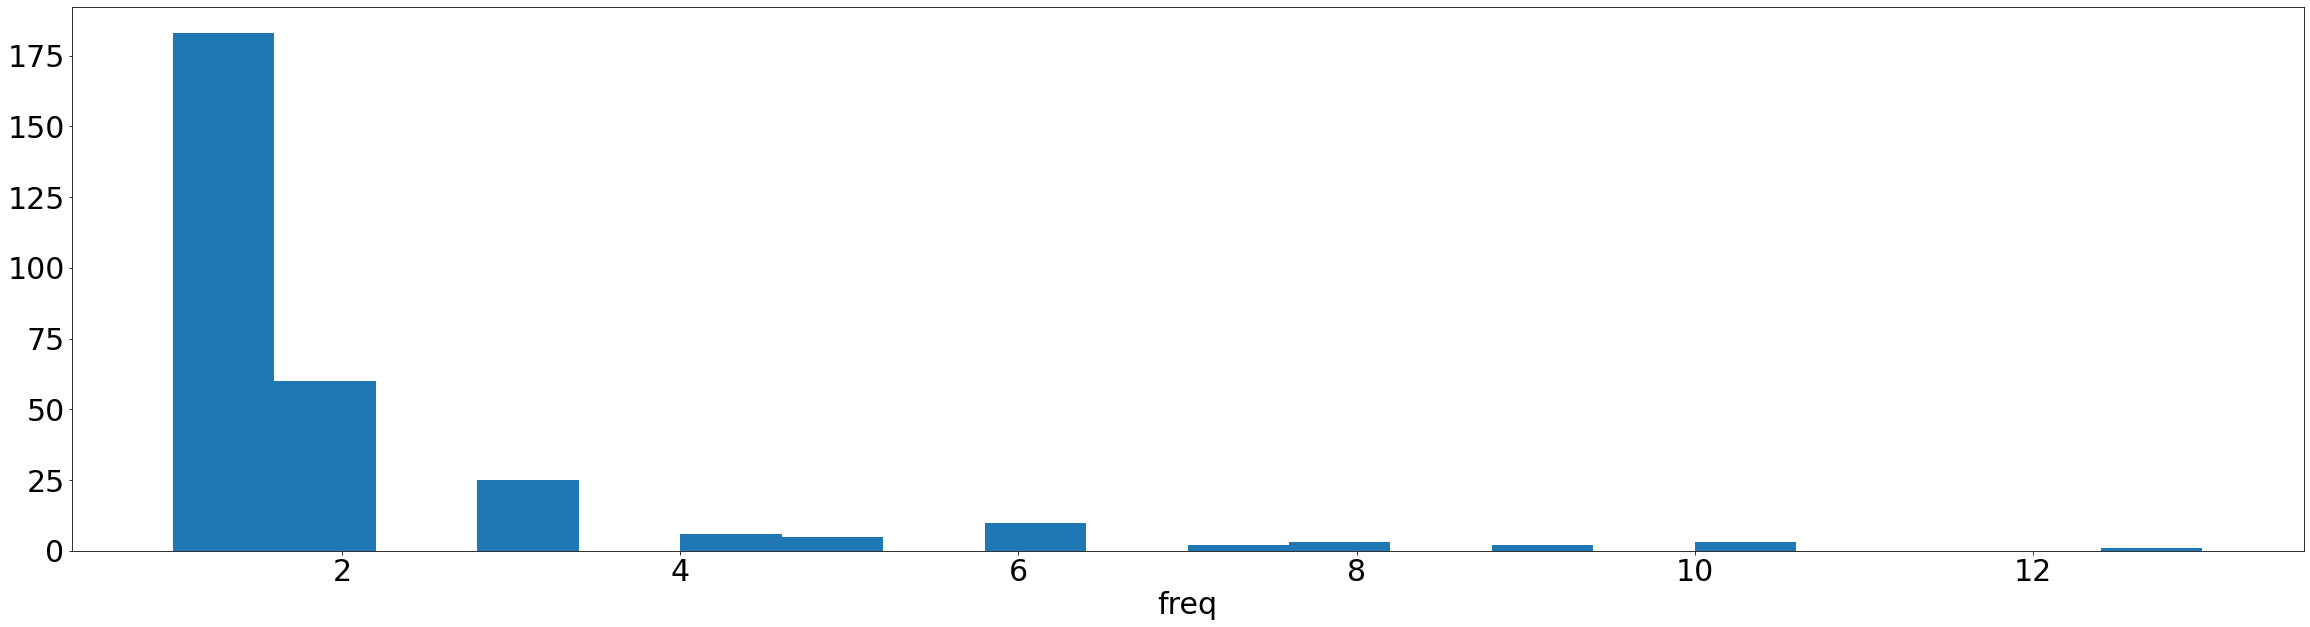

In [14]:
fig = plt.figure(figsize=(40, 10))
plt.xlabel('freq', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.hist(X_coo_df['weight'], bins=20)

In [15]:
arr = X_coo_df['weight']
median = np.percentile(arr, 70, axis=None, interpolation='midpoint')
median

C:\Users\pecu6\AppData\Local\Temp\ipykernel_21972\2756920151.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  median = np.percentile(arr, 70, axis=None, interpolation='midpoint')


2.0

In [16]:
#df_part = X_coo_df.loc[(arr >= 250) & (arr <= 260)]
df_part = X_coo_df.loc[arr >= median]
df_part = df_part.reset_index()
df_part = df_part.drop(columns="index")
df_part

,word1,word2,weight
0,0,0,6
1,0,12,2
2,1,1,5
3,1,7,2
4,1,13,2
...,...,...,...
112,35,22,3
113,35,24,2
114,35,29,3
115,35,33,2


In [17]:
for i in range(0, len(df_part)):
    if( df_part['word1'][i] == df_part['word2'][i] ):
        df_part = df_part.drop(index=i)

In [18]:
df_part[df_part['word2'] == 0].sort_values(['weight'], ascending=False)

,word1,word2,weight
35,12,0,2


In [19]:
# 將 coo_matrix 轉換成邊權重列表
edges = []
weights = []
for i, row in df_part.iterrows():
    edges.append((row['word1'], row['word2']))
    weights.append(row['weight'])

In [20]:
# 創建空圖形
G = nx.Graph()

# 添加節點
for i in df_part.index:
    G.add_node(df_part['word1'][i])

In [21]:
# 添加邊
for i in range(len(edges)):
    G.add_edge(edges[i][0], edges[i][1], weight=weights[i])

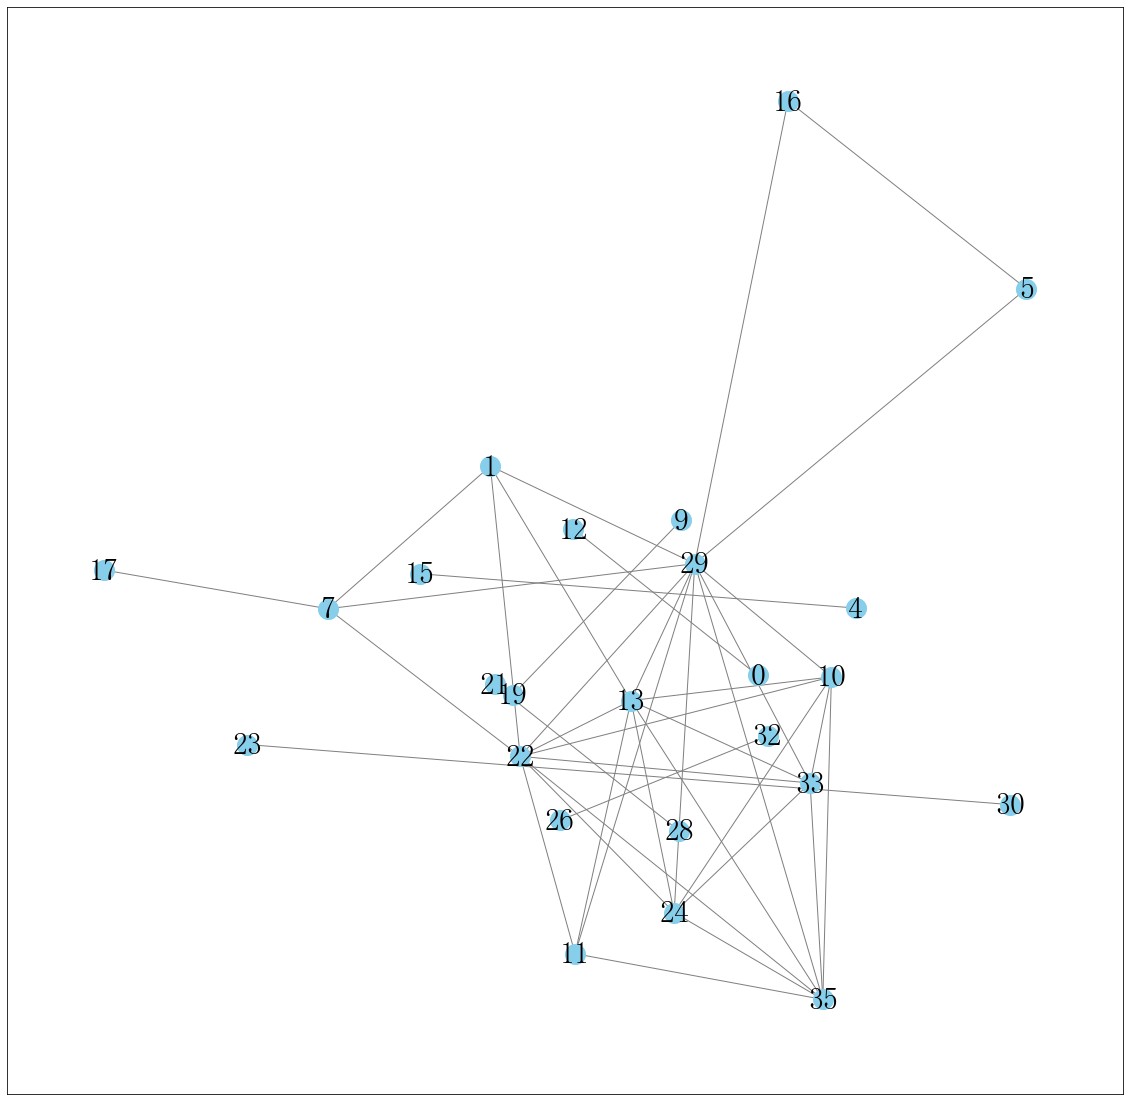

In [22]:
import matplotlib.pyplot as plt

# 繪製圖形
fig = plt.figure(figsize=(20, 20))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=400, node_color='skyblue')
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=1)
nx.draw_networkx_labels(G, pos, font_size=30, font_family='SimSun')

# 顯示圖形
plt.show()